# Code Initiation

In [1]:
# Imports
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import pandas as pd
import matplotlib.pyplot as plt
import random
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

# Imports the model variables 
par = model.par

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Question 1: Edgeworth box illustration

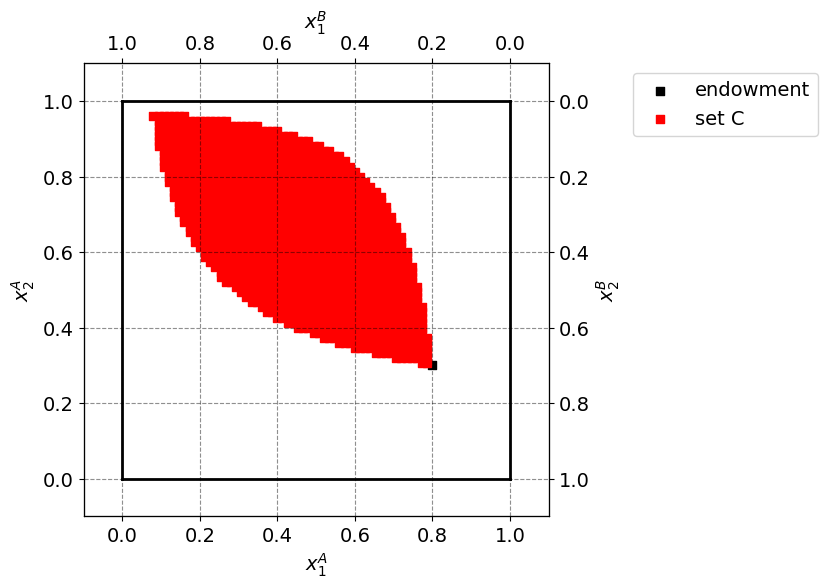

In [2]:
# Creating an empty list and defines variables
N = 75
X1 = []
x = 0 

w1A = 0.8
w2A = 0.3

# Creates the values of x1A and x2A as defined and appends to list
while x/N <= 1:
    X1.append(x/N)
    x+=1

# Creates dataframe with the values of x1A and x2A
xA_df = pd.DataFrame(columns=['x1A', 'x2A'])

# For each values in x1A and x2A the conditions in set C are run through to find the allocations
for x1A in X1:
    for x2A in X1:
       if model.utility_A(x1A, x2A) >= model.utility_A(w1A, w2A):
           if model.utility_B(1-x1A, 1-x2A) >= model.utility_B(1-w1A, 1-w2A):
               xA_df.loc[len(xA_df)] = [x1A, x2A]

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()
            
# Plots the allocations
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(xA_df['x1A'],xA_df['x2A'],marker='s',color='red',label='set C')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0))

# Shows plot
plt.show()

# Question 2: Market clearing error

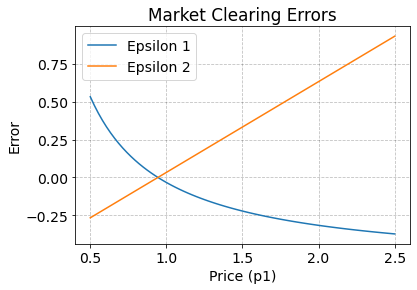

In [3]:
# Defines the price vector prices
prices = []
N = 75
i = 0

# While loop that creates the prices and puts it in the list prices
while 0.5 + 2 * i / N <= 2.5:
    prices.append(0.5 + 2 * i / N)
    i += 1

# Lists to store errors
eps1_values = []
eps2_values = []

# Calculates the error in the market clearing conditions eps1 and eps2 for each price
for p in prices:
    eps1, eps2 = model.check_market_clearing(p)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

# Plotting the errors against prices
plt.plot(prices, eps1_values, label='Epsilon 1')
plt.plot(prices, eps2_values, label='Epsilon 2')

# Adding labels and title
plt.xlabel('Price (p1)')
plt.ylabel('Error')
plt.title('Market Clearing Errors')
plt.legend()

# Display the plot
plt.show()

# Question 3: Market clearing price (p1)

In [4]:
from scipy.optimize import root_scalar

# Defines a function that calculates eps1 and eps2 for a given p1
def market_clearing_equation(p1):
    eps1, eps2 = model.check_market_clearing(p1) # Call the model's function to calculate eps1 and eps2
    return eps1 - eps2 # Return the difference between eps1 and eps2

# Find the root of the market clearing equation where eps1 - eps2 = 0
result = root_scalar(market_clearing_equation, bracket=[0.5, 1])

# Check if the root finding was successful
p1_market_clearing = result.root

p1_3 =  p1_market_clearing 
print("Market clearing price (p1) = " + str(p1_3))

Market clearing price (p1) = 0.9444444444444443


# Question 4a: Max utility allocation - price vector

In [18]:
# Defines empty dataframe with values
maxUtility = pd.DataFrame(columns=['p1', 'x1A', 'x2A', 'uA'])

# Goes through all the p1 values in prices and finds the utility of A
for p in prices:
    x1B,x2B = model.demand_B(p)
    if (x1B or x2B) > 1.0: # This code makes sure there are no x1B or x2B greater than 1 when finding the maxutility
        maxUtility.loc[len(maxUtility)] = [p, 1-x1B, 1-x2B, 0]
    else:
        uA = model.utility_A(1-x1B, 1-x2B)
        maxUtility.loc[len(maxUtility)] = [p, 1-x1B, 1-x2B, uA]

# Find the index of the row with the maximum value of uA
max_uA_index = maxUtility['uA'].idxmax()

# Extract the row with the maximum value of uA
max_uA_row = maxUtility.loc[max_uA_index]

x1A_4a = max_uA_row['x1A']
x2A_4a = max_uA_row['x2A']
p1_4a = max_uA_row['p1']
uA_4a = max_uA_row['uA']
uB_4a = model.utility_B(1-x1A_4a, 1-x2A_4a)

print("Max Utility Allocation (4a): x1A = {:.5f}. x2A = {:.5f}.".format(x1A_4a, x2A_4a))
print("Max Utility for Agent A (4a): uA = {:.5f}".format(uA_4a))
print("Max Utility for Agent B (4a): uB = {:.5f}".format(uB_4a))
print("Optimal p1 (4a): {:.5f}".format(p1_4a))

Max Utility Allocation (4a): x1A = 0.61932. x2A = 0.64089.
Max Utility for Agent A (4a): uA = 0.63362
Max Utility for Agent B (4a): uB = 0.37335
Optimal p1 (4a): 1.88667


# Question 4b: Max utility allocation - all prices

In [17]:
# Define the negative utility function to maximize
def negative_utility_A(p1):
    if p1 <= 0:
        return float('inf')  # Return positive infinity to avoid p1 being zero
    return -model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])

# Find the maximum utility for the given price
result = minimize_scalar(negative_utility_A, bounds=[1e-6, None])  # Set a minimum bound for p1

# Check if optimization was successful
if result.success:
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
    optimal_p1 = result.x
else:
    print("Optimization failed:", result.message)


x1A = (1-model.demand_B(optimal_p1)[0])
x2A = (1-model.demand_B(optimal_p1)[1])

x1A_4b = x1A
x2A_4b = x2A
p1_4b = optimal_p1
uA_4b = max_uA
uB_4b = model.utility_B(1-x1A_4b, 1-x2A_4b)

print("Max Utility Allocation (4b): x1A = {:.5f}. x2A = {:.5f}.".format(x1A_4b, x2A_4b))
print("Max Utility for Agent A (4b): uA = {:.5f}".format(uA_4b))
print("Max Utility for Agent B (4b): uB = {:.5f}".format(uB_4b))
print("Optimal p1 (4b): {:.5f}".format(optimal_p1))

Max Utility Allocation (4b): x1A = 0.62097. x2A = 0.64004.
Max Utility for Agent A (4b): uA = 0.63362
Max Utility for Agent B (4b): uB = 0.37256
Optimal p1 (4b): 1.89935


# Question 5a: Max utility allocation - choice set

In [16]:
N = 75
X1 = []
x = 0 

# Again creates the list X1 based on the x1A and x2A values in the set C
while x/N <= 1:
    X1.append(x/N)
    x+=1

maxUtility5 = pd.DataFrame(columns=['x1A', 'x2A', 'uA']) # Creates empty DF

w1A = 0.8
w2A = 0.3

w1B = 1 - par.w1A
w2B = 1 - par.w2A

# Runs through every condition in set C to make sure no conditions are violated
for x1A in X1:
    for x2A in X1:
        x1B = 1 - x1A
        x2B = 1 - x2A

        uA = model.utility_A(x1A, x2A)
        uB = model.utility_B(x1B, x2B)
        
        if uA >= model.utility_A(w1A, w2A):
            if uB >= model.utility_B(w1B, w2B):
                maxUtility5.loc[len(maxUtility5)] = [x1A, x2A, uA] # Appends to the DF
            else:
                pass
        else:
            pass


max_uA_index5 = maxUtility5['uA'].idxmax() # Find the index of the row with the maximum value of uA
max_uA_row5 = maxUtility5.loc[max_uA_index5] # Extract the row with the maximum value of uA
#print(max_uA_row5)

x1A_5a = max_uA_row5['x1A']
x2A_5a = max_uA_row5['x2A']
uA_5a = max_uA_row5['uA']
uB_5a = model.utility_B(1-x1A_5a, 1-x2A_5a)

print("Max Utility Allocation (5a): x1A = {:.5f}. x2A = {:.5f}.".format(x1A_5a, x2A_5a))
print("Max Utility for Agent A (5a): uA = {:.5f}".format(uA_5a))
print("Max Utility for Agent B (5a): uB = {:.5f}".format(uB_5a))

Max Utility Allocation (5a): x1A = 0.56000. x2A = 0.85333.
Max Utility for Agent A (5a): uA = 0.74155
Max Utility for Agent B (5a): uB = 0.30508


# Question 5b: Max utility allocation - restrictions

In [15]:
# Define the negative utility function to maximize
def negative_utility_A(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)

# Define the constraint function
def constraint_function(x):
    x1A, x2A = x
    return model.utility_B(1 - x1A, 1 - x2A) - model.utility_B(w1B, w2B)

# Define the bounds for x1A and x2A
bounds = [[0, 1], [0, 1]]

# Initial guess for x1A and x2A
initial_guess = [0.560, 0.853] # The initial guess is made from the result from 5a

# Define the optimization problem with the constraint
constraint = {'type': 'ineq', 'fun': constraint_function}
result = minimize(negative_utility_A, initial_guess, bounds=bounds, constraints=constraint)

# Check if optimization was successful
if result.success:
    optimal_x1A, optimal_x2A = result.x
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
else:
    print("Optimization failed:", result.message)
    
x1A_5b = optimal_x1A
x2A_5b = optimal_x2A
uA_5b = max_uA
uB_5b = model.utility_B(1-x1A_5b, 1-x2A_5b)

print("Max Utility Allocation (5b): x1A = {:.5f}. x2A = {:.5f}.".format(x1A_5b, x2A_5b))
print("Max Utility for Agent A (5b): uA = {:.5f}".format(uA_5b))
print("Max Utility for Agent B (5b): uB = {:.5f}".format(uB_5b))

Max Utility Allocation (5b): x1A = 0.57576. x2A = 0.84443.
Max Utility for Agent A (5b): uA = 0.74323
Max Utility for Agent B (5b): uB = 0.30366


# Question 6a: Max aggregate utility

In [14]:
# Define the negative utility function to maximize
def negative_utility(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A) -model.utility_B(1-x1A, 1-x2A)

# Define the bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess for x1A and x2A
initial_guess = [0.5, 0.5]  # You may adjust this based on your problem domain

# Define the optimization problem with the constraint
result = minimize(negative_utility, initial_guess, bounds=bounds)

# Check if optimization was successful
if result.success:
    optimal_x1A, optimal_x2A = result.x
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
else:
    print("Optimization failed:", result.message)
    
x1A_6a = optimal_x1A
x2A_6a = optimal_x2A
uA_6a = max_uA
uB_6a = model.utility_B(1-x1A_6a, 1-x2A_6a)

print("Max Utility Allocation (6a): x1A = {:.5f}. x2A = {:.5f}.".format(x1A_6a, x2A_6a))
print("Max Utility for Agent A (6a): uA = {:.5f}".format(uA_6a))
print("Max Utility for Agent B (6a): uB = {:.5f}".format(uB_6a))

Max Utility Allocation (6a): x1A = 0.33333. x2A = 0.66667.
Max Utility for Agent A (6a): uA = 1.05827
Max Utility for Agent B (6a): uB = 0.52913


# Question 6b: All allocations

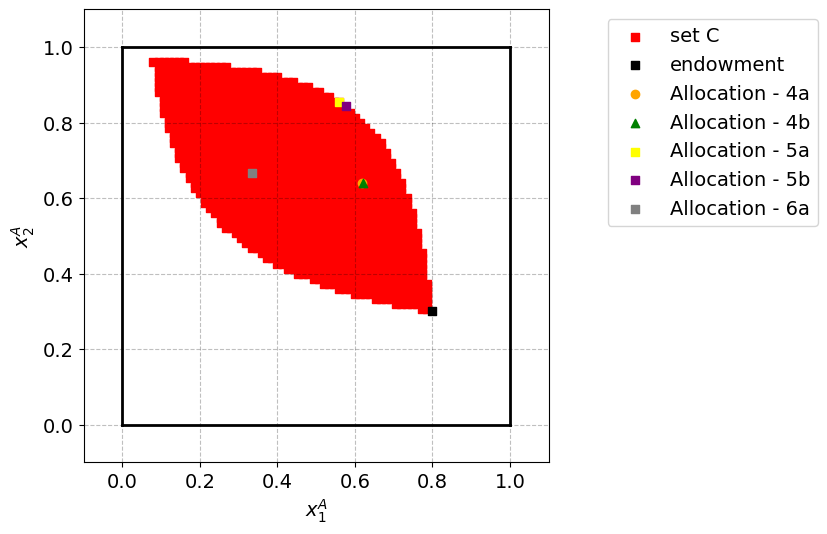

In [10]:
# Create a new figure and axis object
fig_new = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_sub = fig_new.add_subplot(1, 1, 1)

ax_sub.set_xlabel("$x_1^A$")
ax_sub.set_ylabel("$x_2^A$")

# Scatter plot for each allocation
ax_sub.scatter(xA_df['x1A'],xA_df['x2A'],marker='s',color='red',label='set C')
ax_sub.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')
ax_sub.scatter(x1A_4a, x2A_4a, marker='o', color='orange', label='Allocation - 4a')
ax_sub.scatter(x1A_4b, x2A_4b, marker='^', color='green', label='Allocation - 4b')
ax_sub.scatter(x1A_5a, x2A_5a, marker='s', color='yellow', label='Allocation - 5a')
ax_sub.scatter(x1A_5b, x2A_5b, marker='s', color='purple', label='Allocation - 5b')
ax_sub.scatter(x1A_6a, x2A_6a, marker='s', color='gray', label='Allocation - 6a')


# Limits
ax_sub.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_sub.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_sub.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_sub.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_sub.set_xlim([-0.1, w1bar + 0.1])
ax_sub.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_sub.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# shows plot
plt.show()

## Question 6b.1: Pros and cons with allocations

Each allocation presents distinct trade-offs. Allocation (6a) stands out, providing Agent A with the highest utility while also benefiting Agent B more compared to other allocations. However, it heavily favors Agent A, potentially raising concerns of fairness. Allocations (4a) and (4b) offer a balanced distribution of goods, but Agent B receives lower utility values. Allocations (5a) and (5b) prioritize Agent A's utility, resulting in substantial imbalances in utility distribution. Thus, while maximizing utility is essential, achieving fairness remains a key consideration in determining the optimal allocation.


# Question 7: Random set W

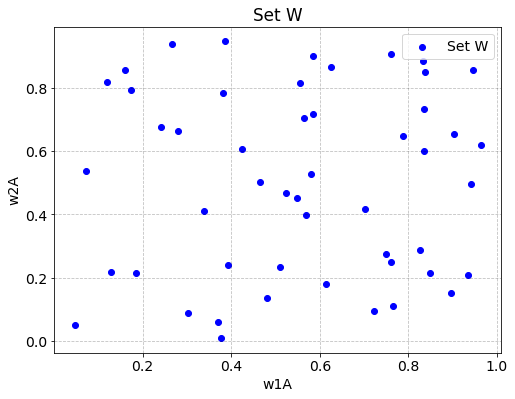

In [11]:
# Sets random seed
random.seed = '42'

# Empty lists with endowment values
w1A_list = []
w2A_list = []

# Loops that generate random values between 0 and 1 for w1a and appends to the empty lists created before
# Runs 2 times with j and 50 times with i
for j in range(2):
    for i in range(50):
        random_number = random.uniform(0, 1)
        #print("Random number between 0 and 1 (excluding 0 and 1):", random_number)
        if j == 0:
            w1A_list.append(random_number)
        else:
            w2A_list.append(random_number)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(w1A_list, w2A_list, color='blue', label='Set W')

# Set labels and title
plt.xlabel('w1A')
plt.ylabel('w2A')
plt.title('Set W')

# Add legend
plt.legend()

# Display the plot
plt.show()

# Question 8: Market equilibrium for set W

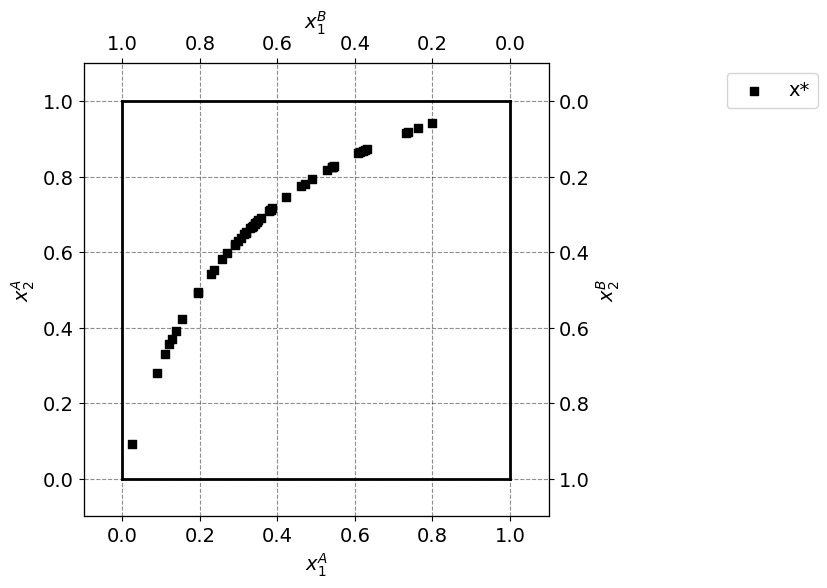

In [13]:
alpha = 1/3
beta = 2/3

x1A_list = []
x2A_list = []


# This while loops uses the endownments from the previous assignment and runs through each of them to find the market equilibrium allocation
# Then appends them to the empty lists created before
i = 0
while i < 50:
    
    # Define a function that calculates eps1 and eps2 for a given p1
    def market_clearing_equation(p1):
        eps1, eps2 = model.market_clearing_new_endowments(p1,w1A_list[i],w2A_list[i]) # Call the model's function to calculate eps1 and eps2
        return eps1 - eps2 # Return the difference between eps1 and eps2

    # Find the root of the market clearing equation where eps1 - eps2 = 0
    result = root_scalar(market_clearing_equation, bracket=[0.5, 2.5])
    p1 = result.root
           
    x1A = alpha * (p1 * w1A_list[i] + 1 * w2A_list[i]) / (p1)
    x2A = (1 - alpha) * (p1 * w1A_list[i] + 1 * w2A_list[i]) / 1
    
    x1A_list.append(x1A)
    x2A_list.append(x2A)
    
    i+=1

# Plots in a new edgeworth box
# Create a new figure and axis object
fig_new = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_new = fig_new.add_subplot(1, 1, 1)

ax_new.scatter(x1A_list, x2A_list, marker='s', color='black', label='x*')

# Draw the limits
ax_new.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_new.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_new.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_new.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set labels and limits
ax_new.set_xlabel("$x_1^A$")
ax_new.set_ylabel("$x_2^A$")
ax_new.set_xlim([-0.1, w1bar + 0.1])
ax_new.set_ylim([-0.1, w2bar + 0.1])

# Create secondary axes
ax_B_new = ax_new.twiny()
ax_B_new.set_xlabel("$x_1^B$")
ax_B_new.set_xlim(ax_new.get_xlim())  # Set the same x limits as primary axes
ax_B_new.invert_xaxis()  # Invert the x-axis to match the primary axes

ax_B_new_y = ax_new.twinx()
ax_B_new_y.set_ylabel("$x_2^B$")
ax_B_new_y.set_ylim(ax_new.get_ylim())  # Set the same y limits as primary axes
ax_B_new_y.invert_yaxis()  # Invert the y-axis to match the primary axes


# Add legend
ax_new.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Show the plot
plt.show()